Epoch 1/20


C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 6.1995 - mae: 2.0427 - val_loss: 3.5954 - val_mae: 1.6739
Epoch 2/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9371 - mae: 1.5668 - val_loss: 2.0051 - val_mae: 1.2100
Epoch 3/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.4357 - mae: 1.1106 - val_loss: 1.1282 - val_mae: 0.8149
Epoch 4/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.9690 - mae: 0.7686 - val_loss: 0.6577 - val_mae: 0.5510
Epoch 5/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5624 - mae: 0.5345 - val_loss: 0.5316 - val_mae: 0.5047
Epoch 6/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.2716 - mae: 0.5115 - val_loss: 0.5330 - val_mae: 0.5116
Epoch 7/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0345 - mae: 0.5272 - val_loss: 0.5310 - val_mae: 0.5119
Epoch 8/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.7660 - mae: 0.5366 - val_loss: 0.5304 - val_mae: 0.5122
Epoch 9/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1010 

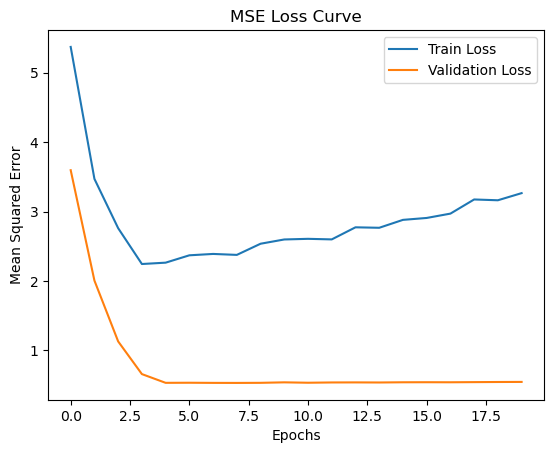

213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Sample Predictions: [0.5866604 1.803066  2.9614067 2.7580433 2.5817633]


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

# Step 1: Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Step 2: Split data (33% test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Define model (no hidden layers)
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=(X_train.shape[1],))  # Linear model
    ])
    return model

model = build_model()

# Step 4: Compile model with RMSprop optimizer and MSE loss
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Step 5: Train model (20 epochs)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=1)

# Plot MSE loss curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('MSE Loss Curve')
plt.legend()
plt.show()

# Predictions
predictions = model.predict(X_test)
print("Sample Predictions:", predictions[:5].flatten())
